## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

In [2]:
#memanggil data
data_train_path = "ikan/train"
data_val_path = "ikan/valid"

In [3]:
#skala ukuran gambar
img_width = 180
img_height = 180

In [4]:
#membaca data latih
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split=False
)

Found 4405 files belonging to 187 classes.


In [5]:
#membuat kategori
class_names = data_train.class_names
data_fish = data_train.class_names

In [6]:
#membuat data validasi
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size = (img_height, img_width),
                                                       batch_size = 32,
                                                       shuffle = False,
                                                       validation_split=False
                                                       )

Found 4405 files belonging to 185 classes.


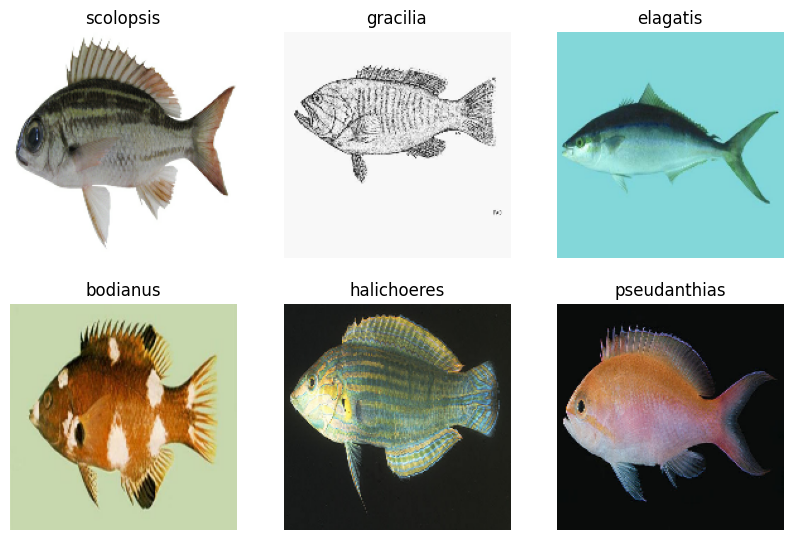

In [7]:
#mencetak 6 gambar acak dari data latih
plt.figure(figsize = (10,10))
for image, labels in data_train.take(1):
  for i in range (6):
    plt.subplot(3,3,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(data_fish[labels[i]])
    plt.axis('off')

In [8]:
#membuat model sequential
from tensorflow.keras.models import Sequential

In [9]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [10]:
model = Sequential([
    layers.Rescaling (1./255), #skala ulang, kumpulan dataset akan disimpan dalam RGB dalam rentang 0-255 
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'), #membuat 3 layers
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D (64, 3, padding = 'same', activation  = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(), #meratakan data
    layers.Dropout(0.2), # agar model tidak outlier
    layers.Dense (128), #kerapatan 128
    layers.Dense (len(data_fish))
])

In [11]:
#mmebuat model optimasi adam
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

In [12]:
#memiliki 709 data dan akan terbagi menjadi 23 batch
epochs_size = 10
history = model.fit(data_train, validation_data = data_val, epochs = epochs_size)

Epoch 1/10


138/138 [==============================] - 143s 1s/step - loss: 4.2385 - accuracy: 0.1537 - val_loss: 6.6181 - val_accuracy: 0.0064
Epoch 2/10
138/138 [==============================] - 136s 983ms/step - loss: 2.6530 - accuracy: 0.4161 - val_loss: 9.8485 - val_accuracy: 0.0048
Epoch 3/10
138/138 [==============================] - 142s 1s/step - loss: 1.3846 - accuracy: 0.6529 - val_loss: 13.4102 - val_accuracy: 0.0050
Epoch 4/10
138/138 [==============================] - 151s 1s/step - loss: 0.6393 - accuracy: 0.8320 - val_loss: 18.2053 - val_accuracy: 0.0054
Epoch 5/10
138/138 [==============================] - 150s 1s/step - loss: 0.3687 - accuracy: 0.9028 - val_loss: 21.8764 - val_accuracy: 0.0050
Epoch 6/10
138/138 [==============================] - 140s 1s/step - loss: 0.2092 - accuracy: 0.9435 - val_loss: 21.7753 - val_accuracy: 0.0050
Epoch 7/10
138/138 [==============================] - 143s 1s/step - loss: 0.1652 - accuracy: 0.9614 - val_loss: 26.7695 - val_accura

Text(0.5, 1.0, 'Loss')

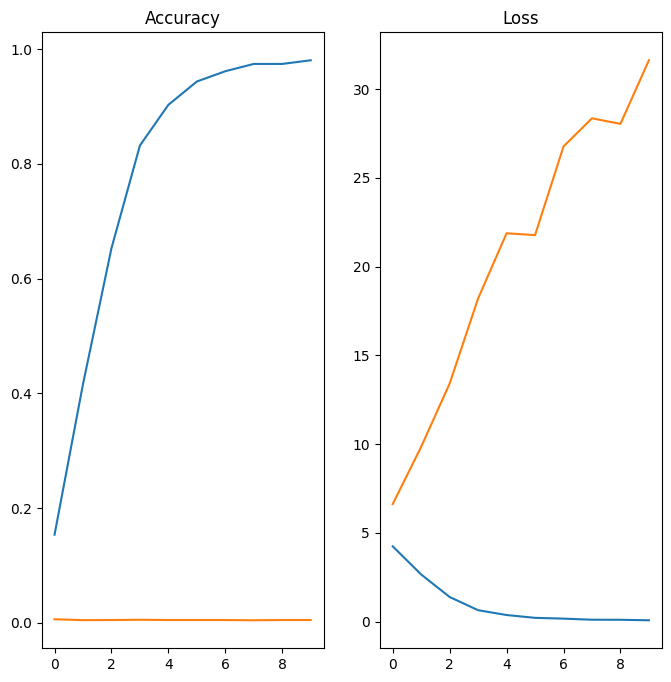

In [13]:
epochs_range = range(epochs_size)
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'], label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'], label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')

In [45]:
image = 'hiu.jpg'
image = tf.keras.utils.load_img(image, target_size = (img_height, img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [46]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 74ms/step


In [47]:
score = tf.nn.softmax(predict)

In [48]:
print(' Ikan termasuk dalam genus {} dengan akurasi {:0.2f}'.format(data_fish[np.argmax(score)], np.max(score)*100))

 Ikan termasuk dalam genus bodianus dengan akurasi 44.29


In [33]:
model.save('Image_classify.keras')